# Plotting 12/11/23

In [1]:
from utils import (
    BaseForecaster, 
    ResidualForecaster,
    TimeSeriesPreprocessor,
    crps,
    HistoricalForecaster
)
from plotting_utils import (
    plot_forecast,
    plot_crps_bydate,
    score_improvement_bysite,
    plot_improvement_bysite,
    plot_global_percentages,
    plot_region_percentages,
    plot_site_type_percentages_bymodel,
    plot_site_type_percentages_global,
    plot_window_and_sitetype_performance,
)
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from darts import TimeSeries
import numpy as np
import CRPS.CRPS as forecastscore
from darts.metrics import rmse
import matplotlib as mpl
from sklearn.cluster import KMeans

targets = pd.read_csv("targets.csv.gz")
metadata = pd.read_csv('NEON_Field_Site_Metadata_20220412.csv')
metadata = metadata.loc[metadata.aquatics == 1][['field_site_id', 'field_site_subtype', 'field_latitude', 'field_longitude']]

# Performing K-Means clustering
num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
metadata['cluster'] = kmeans.fit_predict(metadata[['field_latitude', 'field_longitude']])
region_mapping = {
    0: 'East',
    1: 'Alaska',
    2: 'West',
    3: 'Mid',
    4: 'Puerto Rico'
}
metadata['region'] = metadata['cluster'].map(region_mapping)

/home/rstudio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Now let's get dataframes for all the models

In [12]:
model_names = ["RNN", "TFT", "BlockRNN", "Transformer",
               "NLinear", "DLinear", "NBEATS", "TCN"]
target_variables = ['oxygen', 'temperature', 'chla']
scores_dict = {}
for model in model_names:
    scores_dict[model] = {}
    for target_variable in target_variables:
        scores_dict[model][target_variable] = score_improvement_bysite(model, targets, target_variable, suffix='default')

Write something to save these because processing takes a while

In [3]:
for model in model_names:
    for target_variable in target_variables:
        scores_dict[model][target_variable].to_csv(f'scores/{model}_{target_variable}.csv', index=False)

And, to load.

In [2]:
scores_dict = {}
model_names = ["RNN", "TFT", "BlockRNN", "Transformer",
               "NLinear", "DLinear", "NBEATS", "TCN"]
target_variables = ['oxygen', 'temperature', 'chla']

for model in model_names:
    scores_dict[model] = {}
    for target_variable in target_variables:
        scores_dict[model][target_variable] = pd.read_csv(f'scores/{model}_{target_variable}.csv')

Plotting global model performance across the different target variables

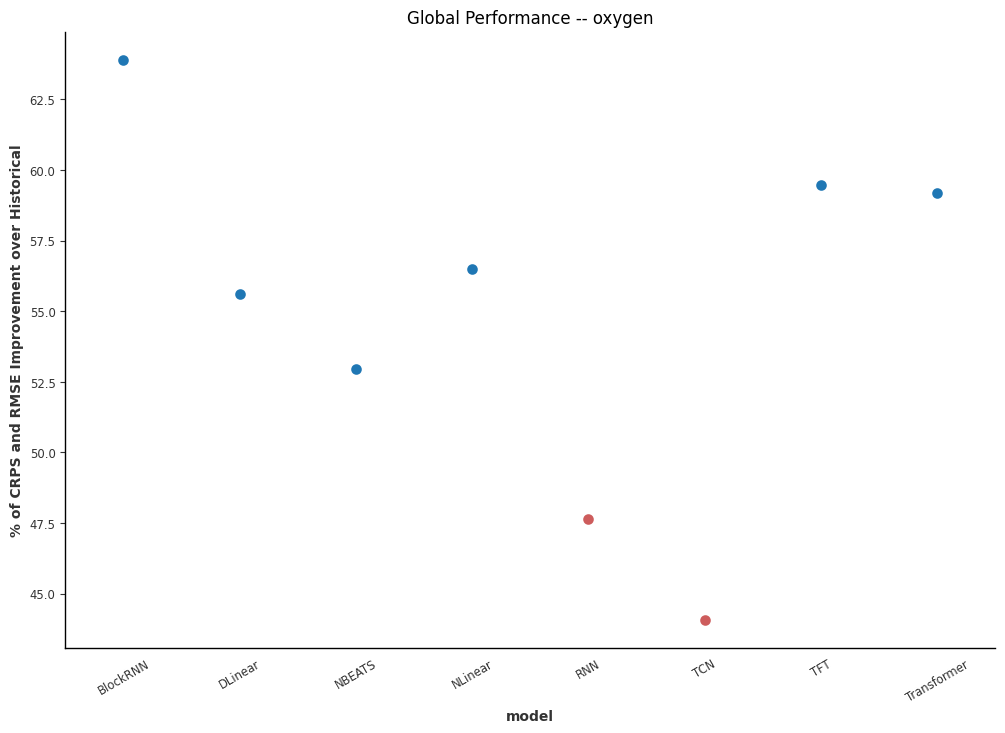

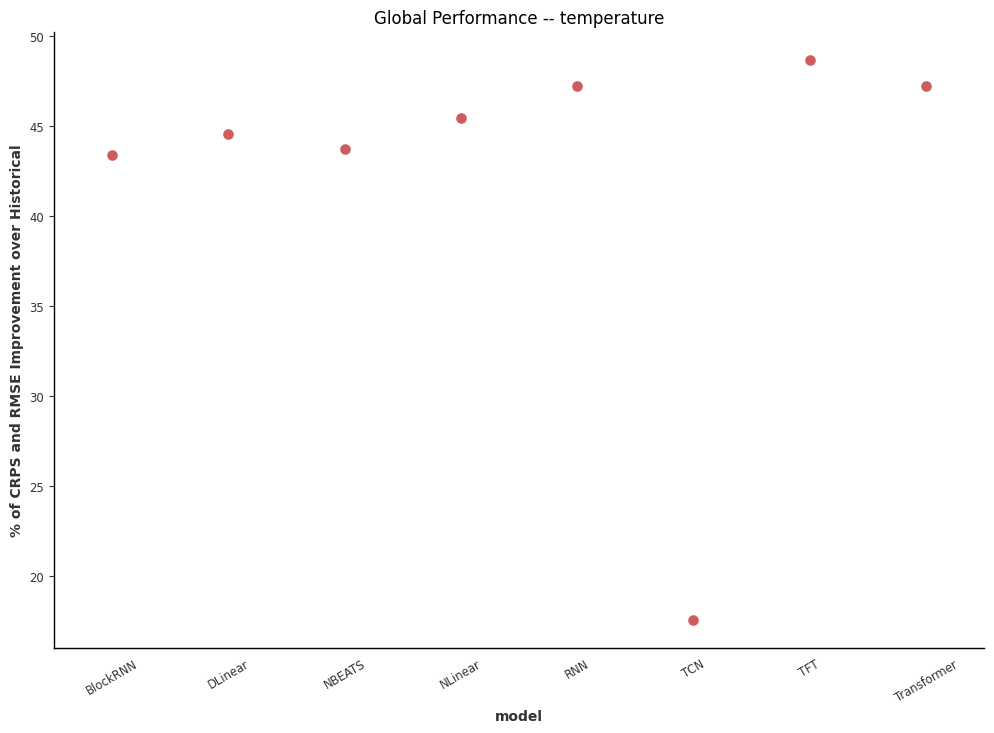

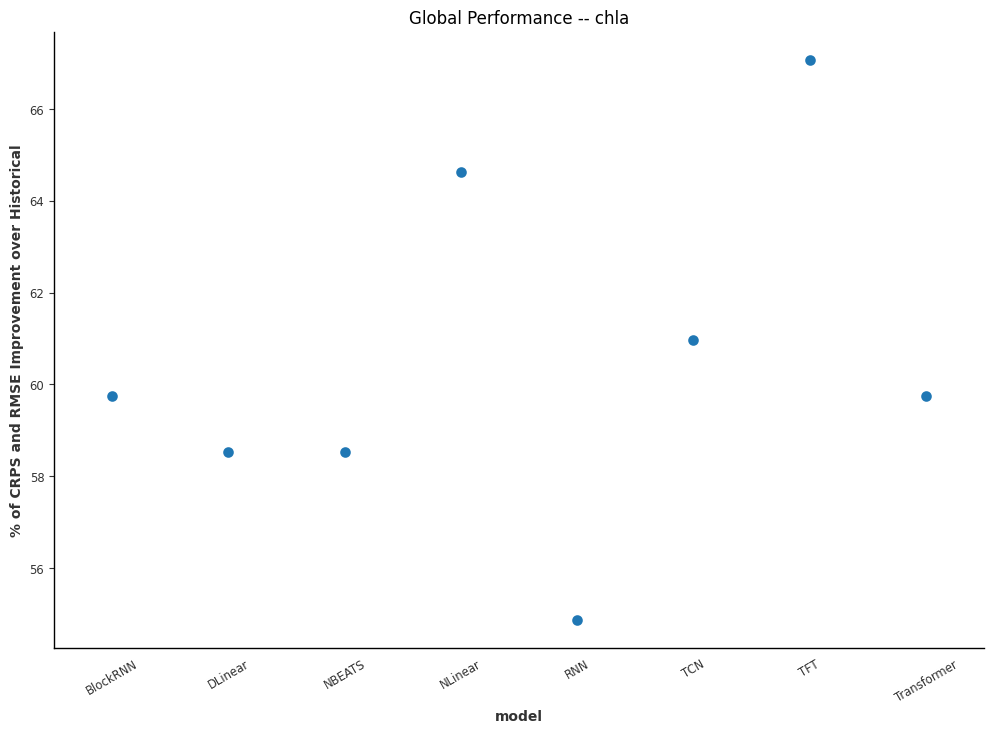

In [14]:
global_dfs = {}

for target_variable in target_variables:
    global_dfs[target_variable] = pd.concat([scores_dict[model][target_variable] for model in model_names])
    plot_global_percentages(global_dfs[target_variable], f'Global Performance -- {target_variable}')

Plot global performance by waterbody type

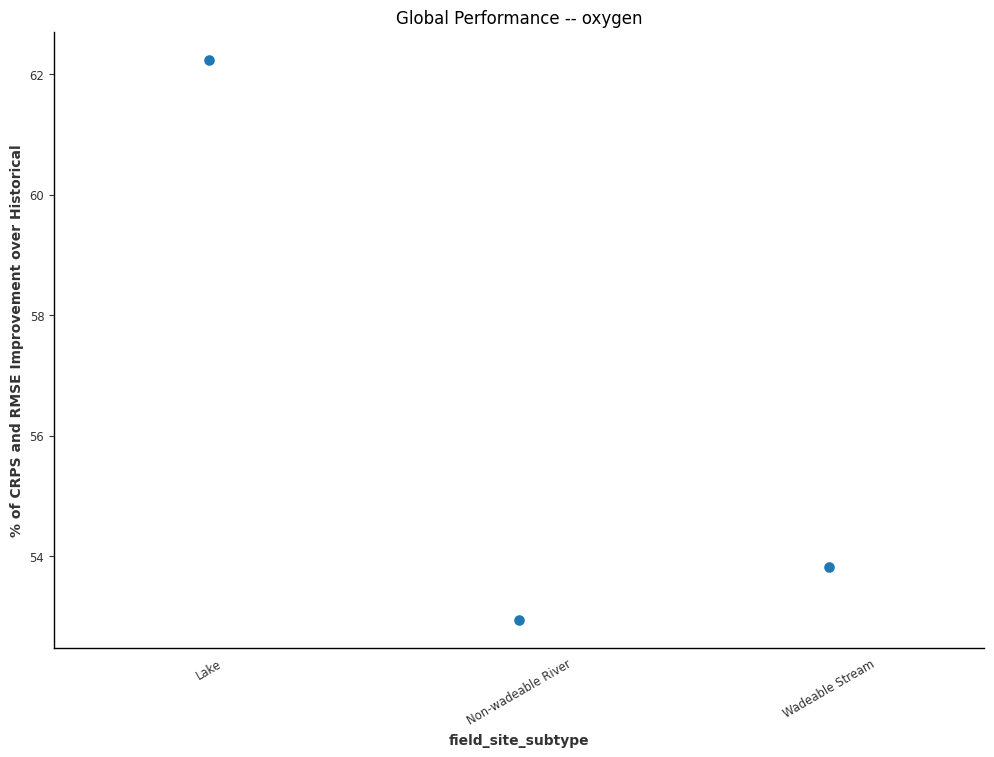

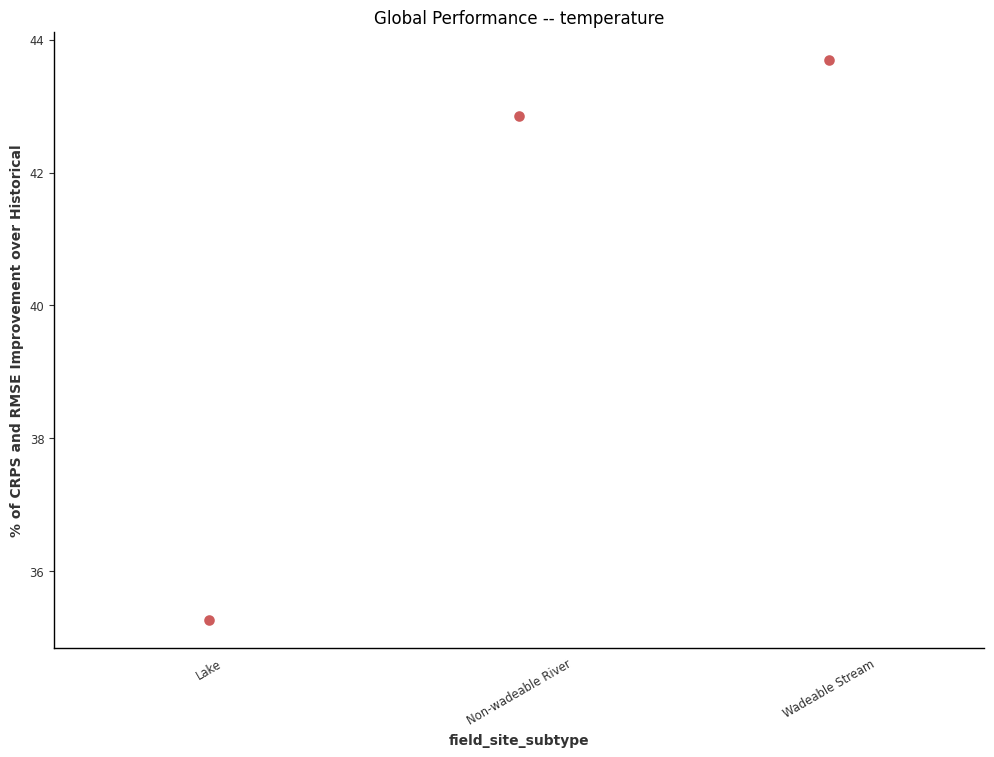

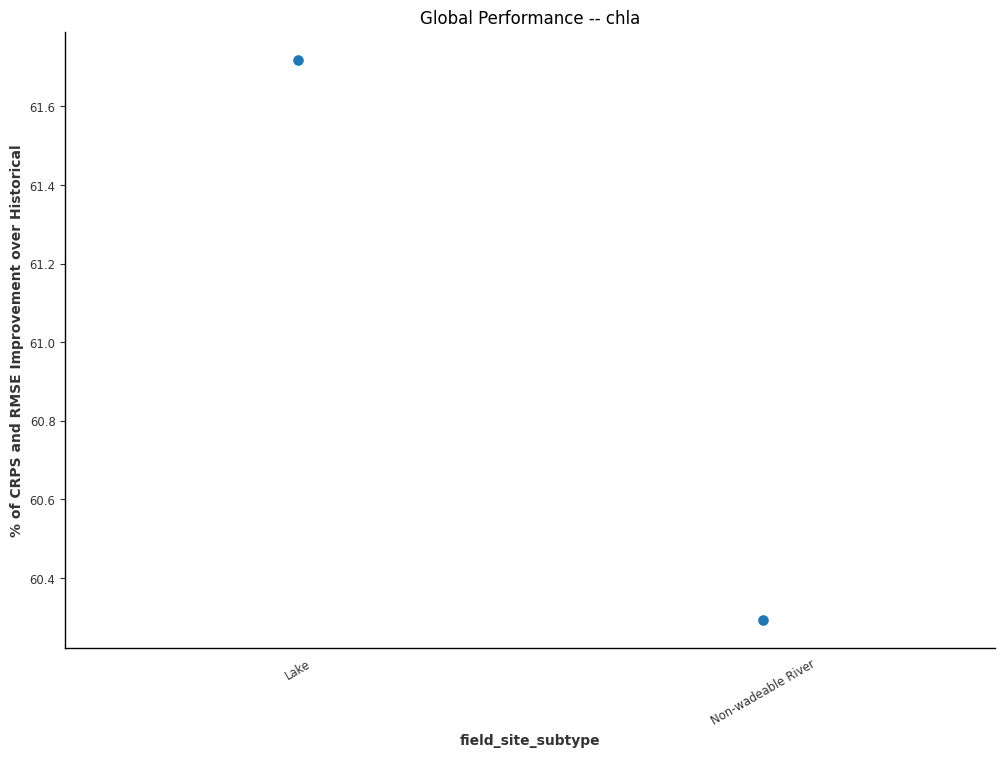

In [5]:
for target_variable in target_variables:
    plot_site_type_percentages_global(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}')

Plot performance by models on different water body types

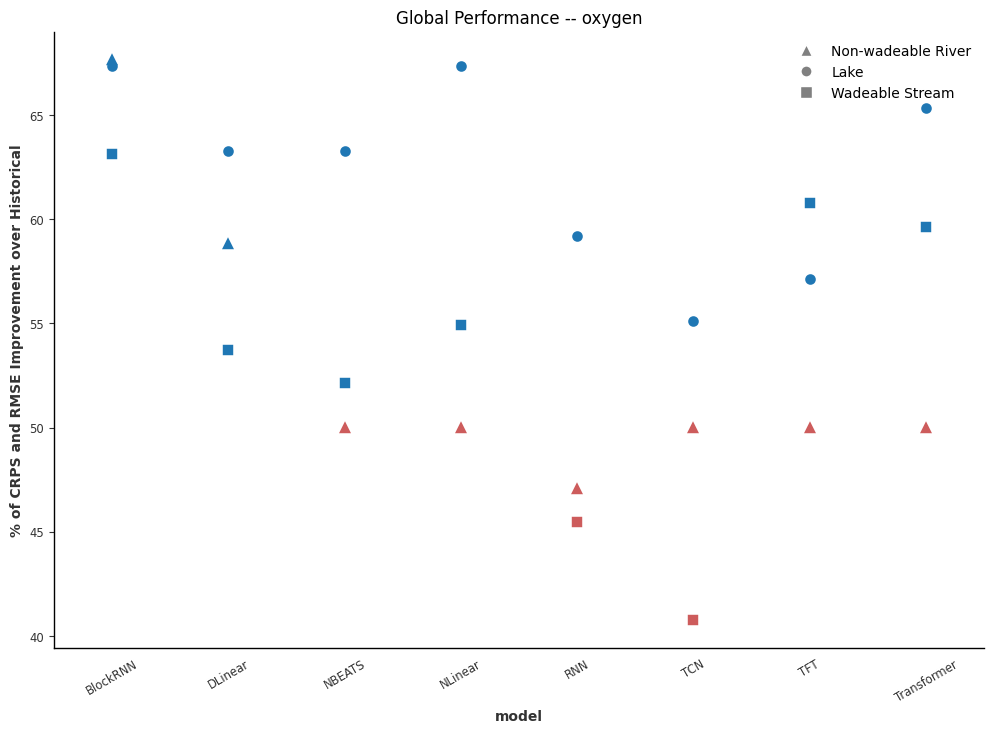

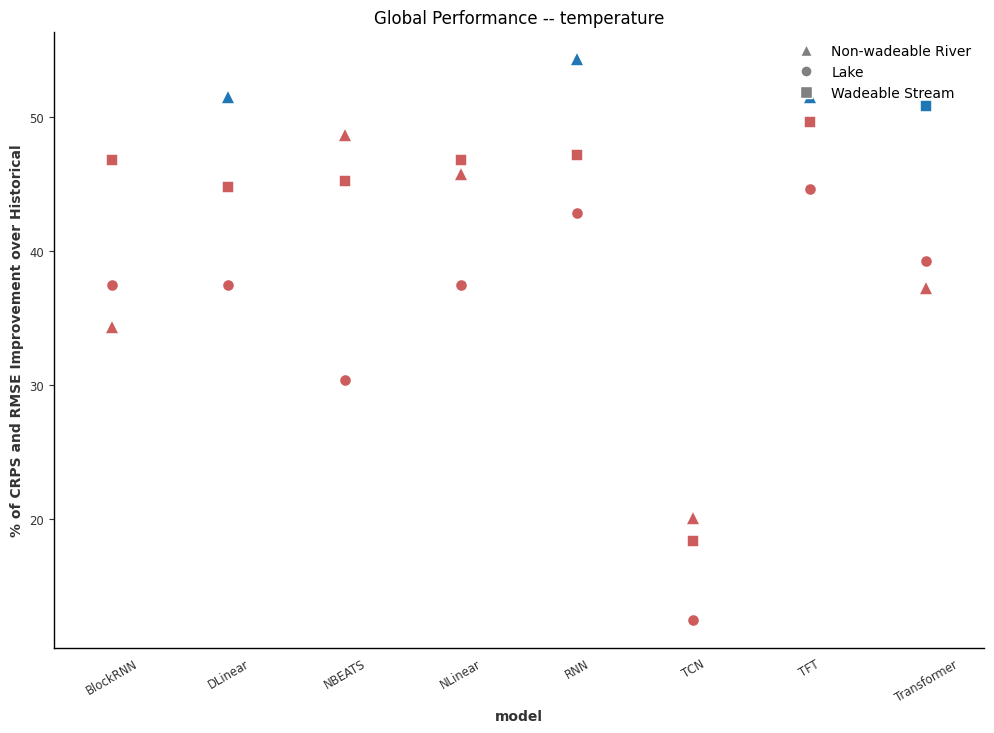

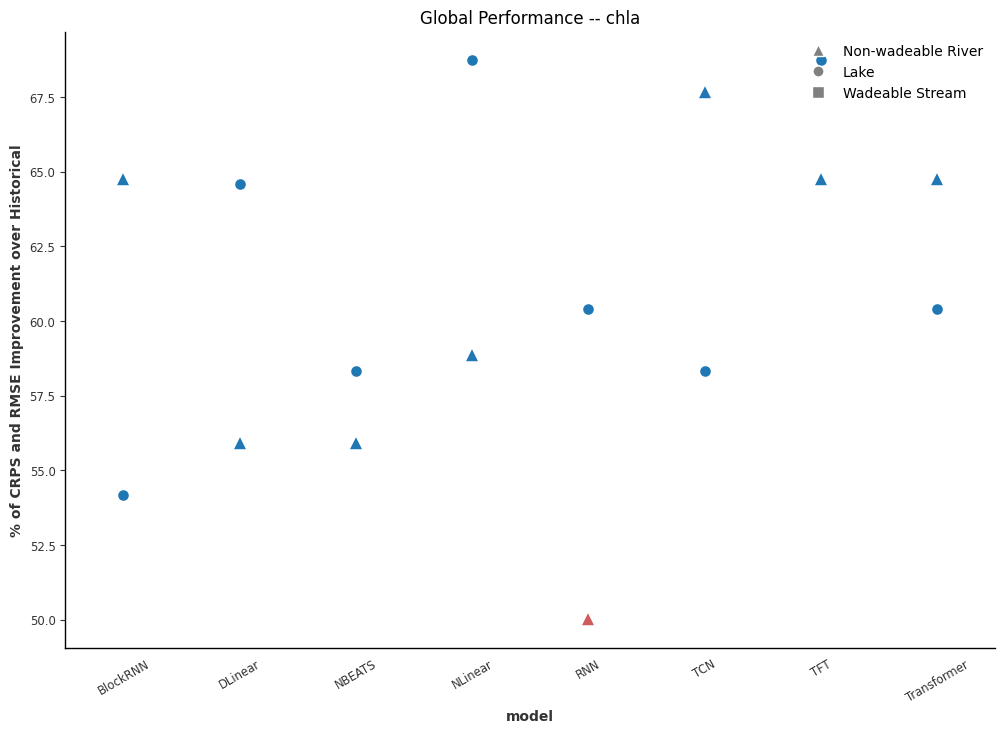

In [6]:
for target_variable in target_variables:
    plot_site_type_percentages_bymodel(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}')

Plot according to date

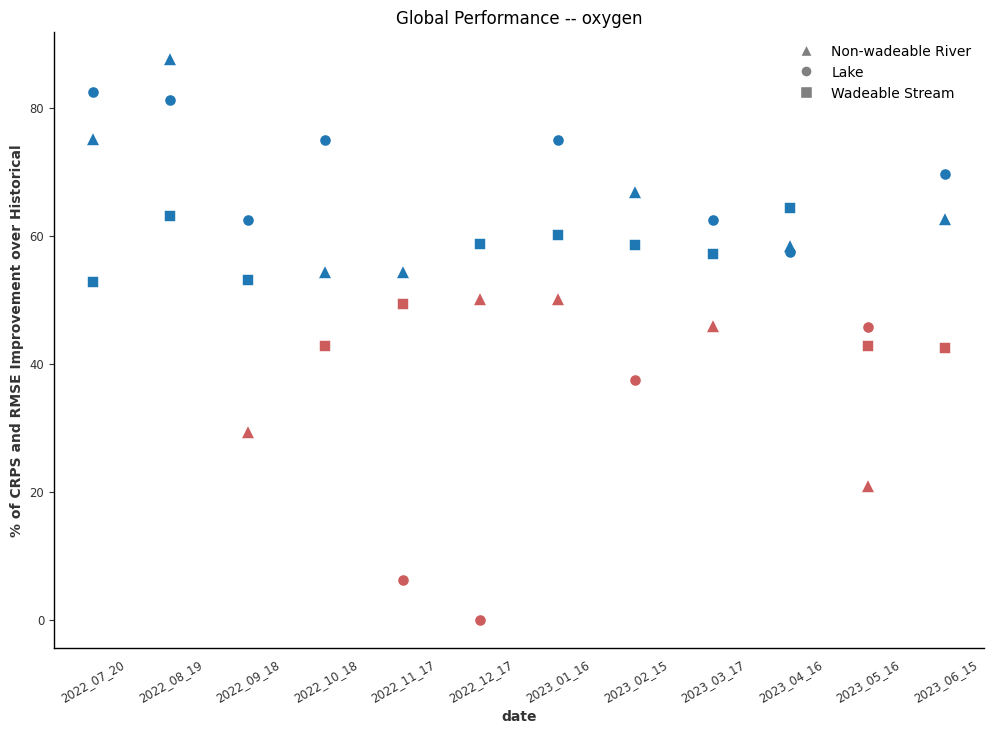

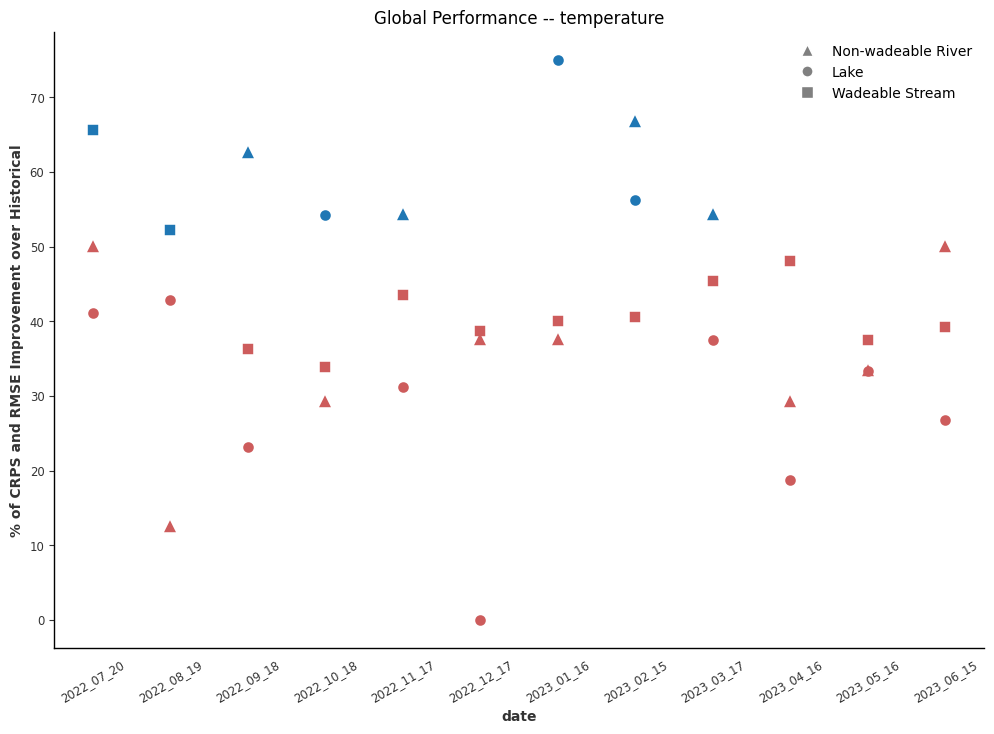

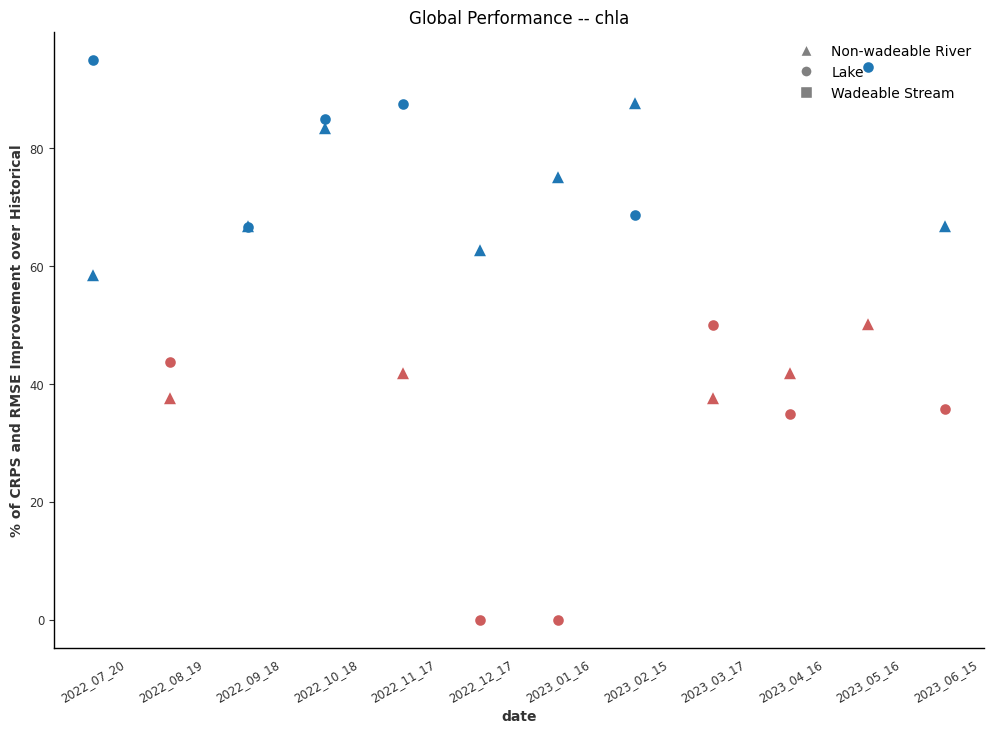

In [7]:
for target_variable in target_variables:
    plot_window_and_sitetype_performance(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}')

Then Geographical region

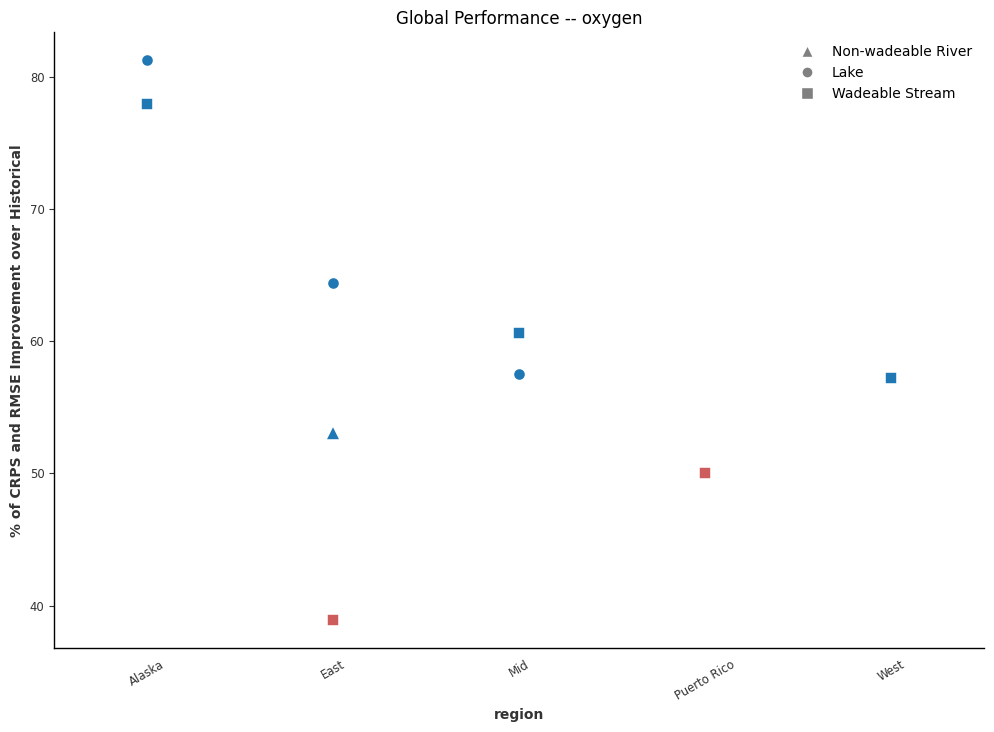

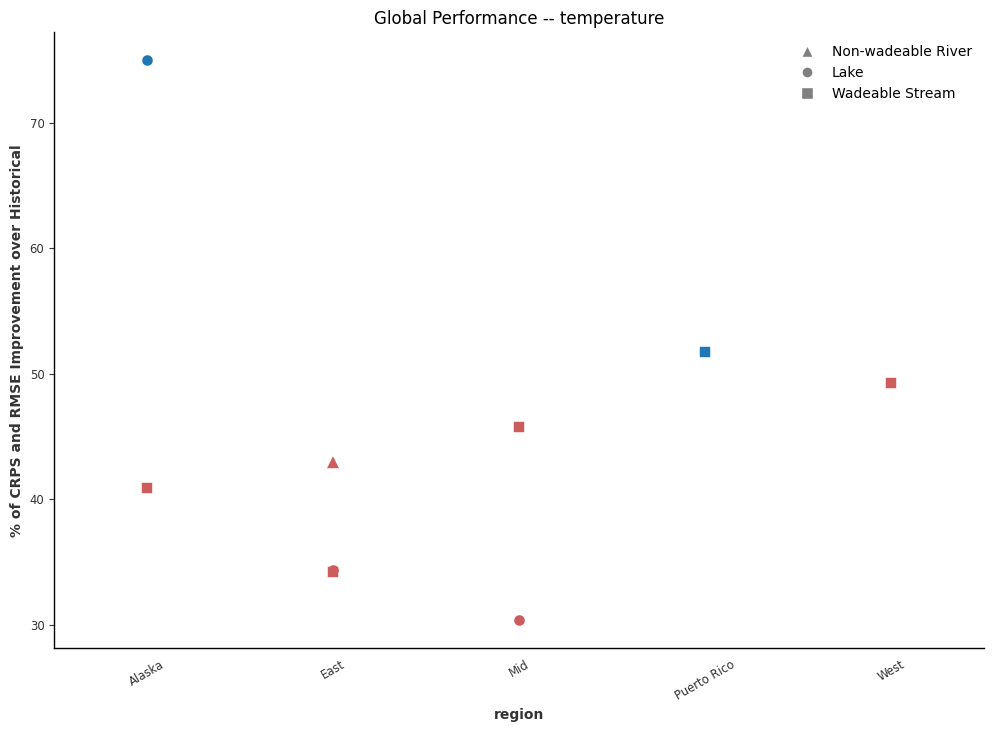

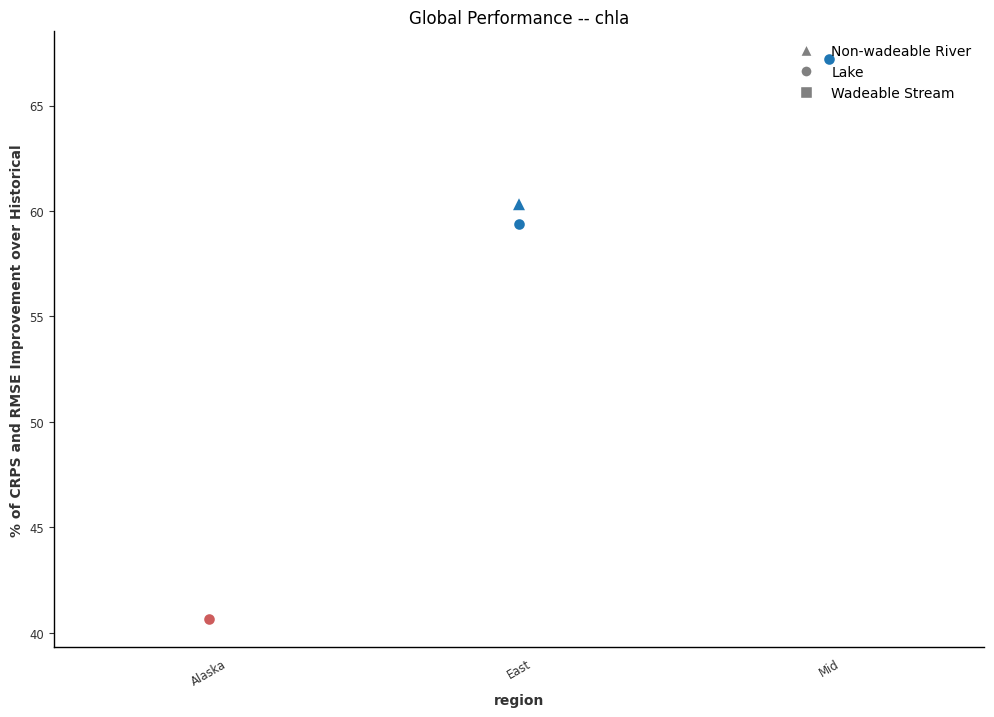

In [8]:
for target_variable in target_variables:
    plot_region_percentages(global_dfs[target_variable], metadata, f'Global Performance -- {target_variable}')

Now looking at the models on site by site basis. DO first.

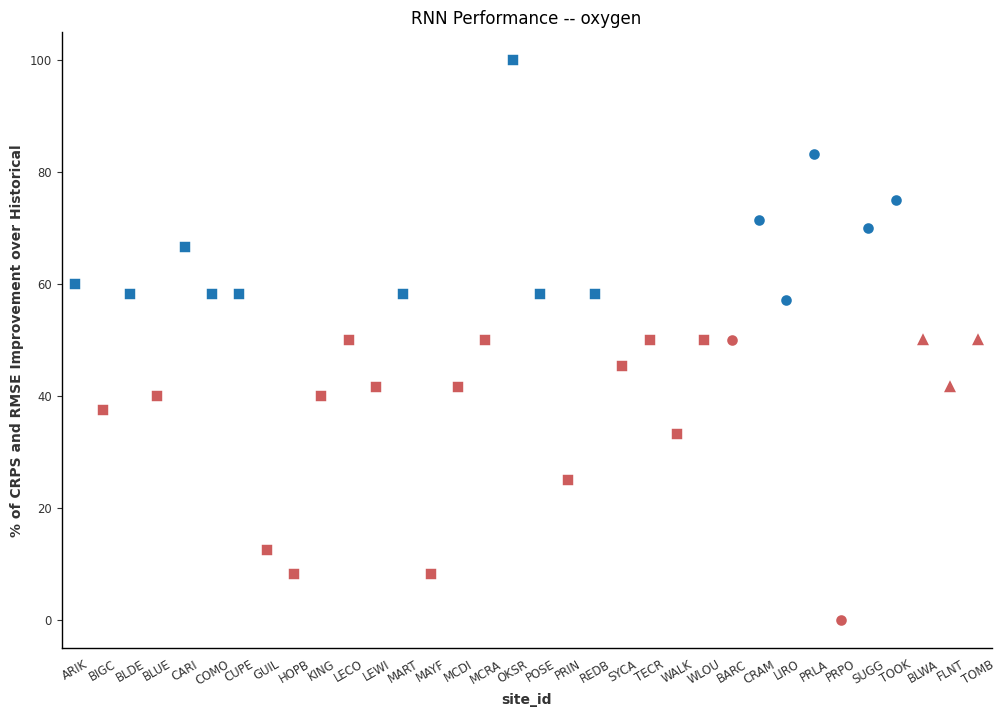

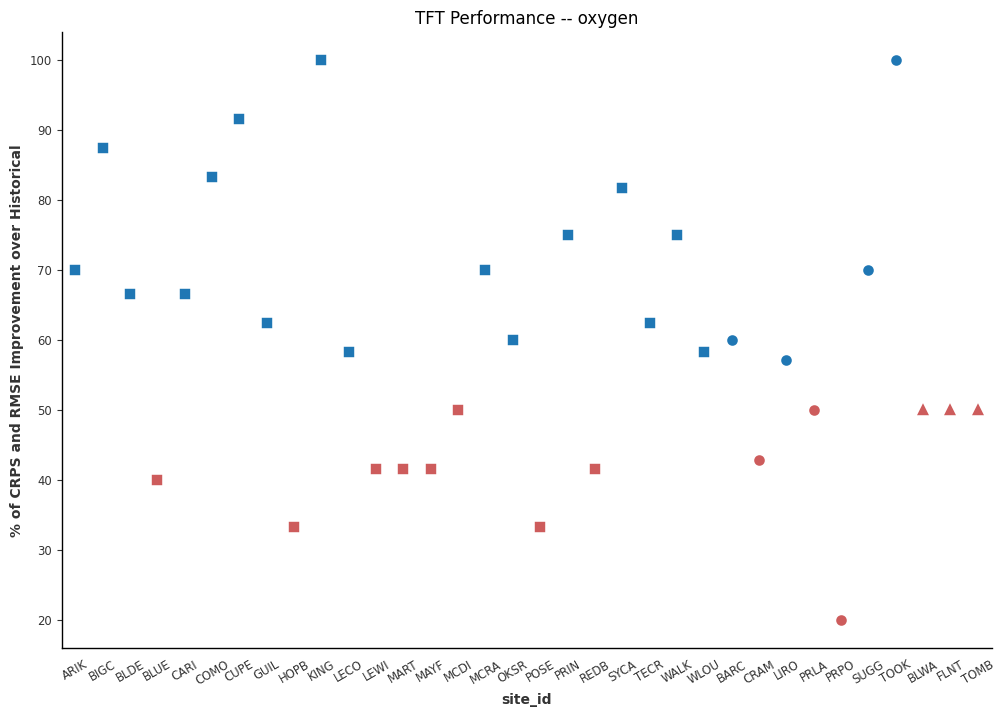

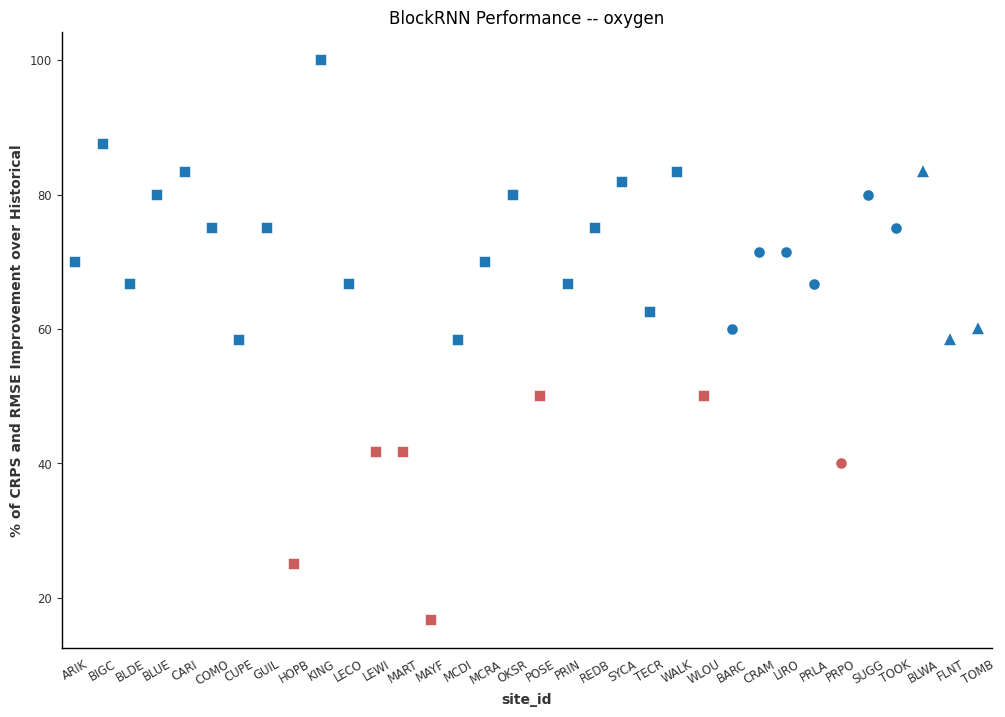

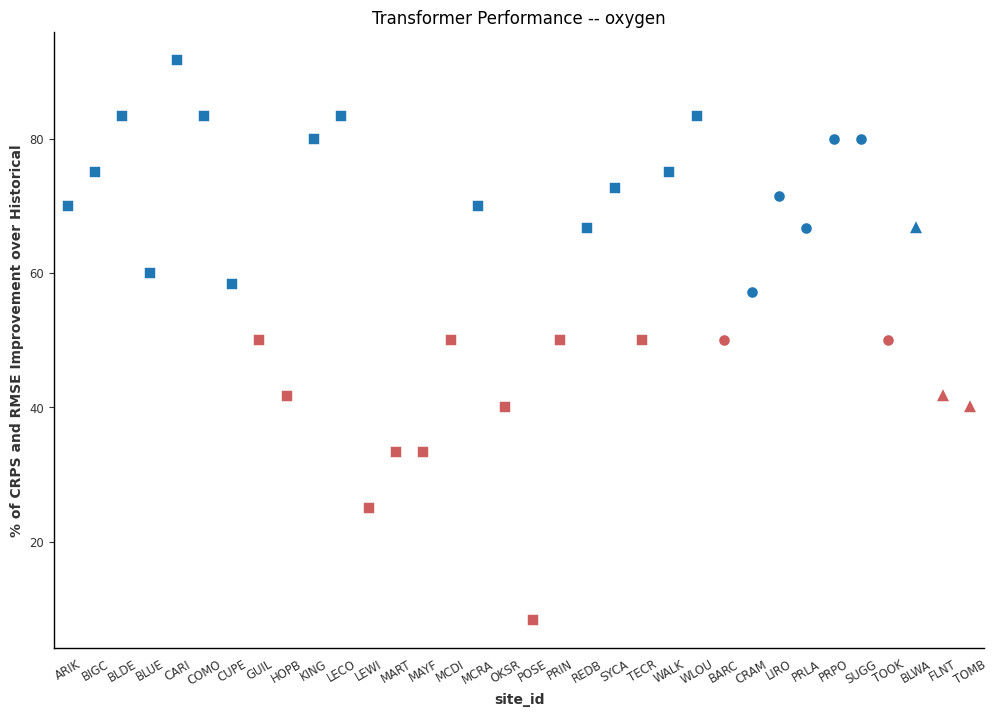

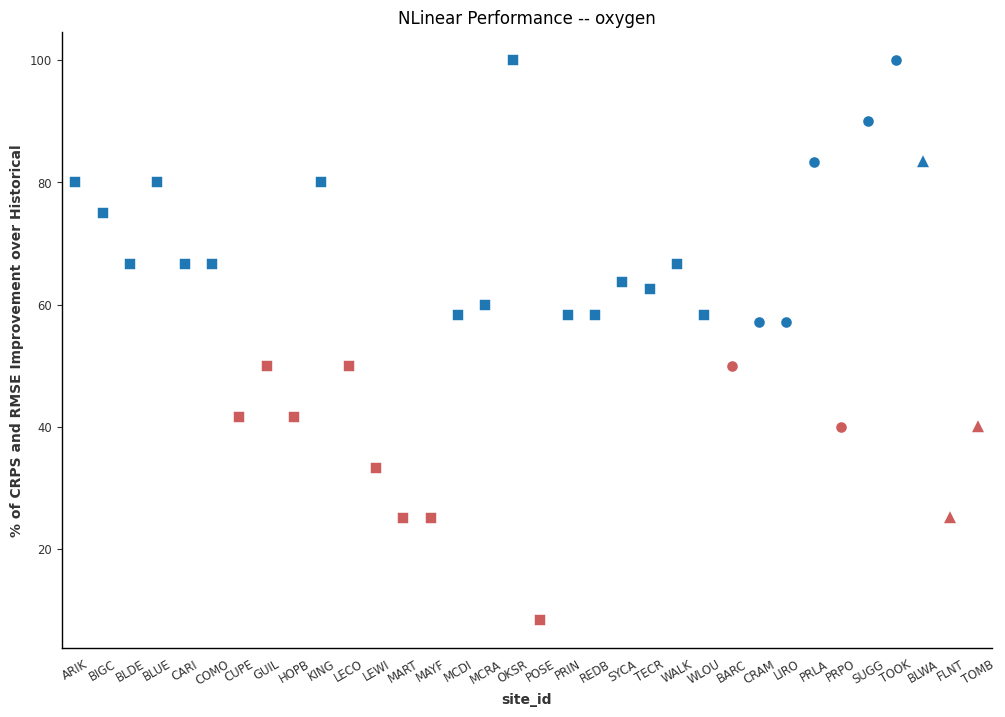

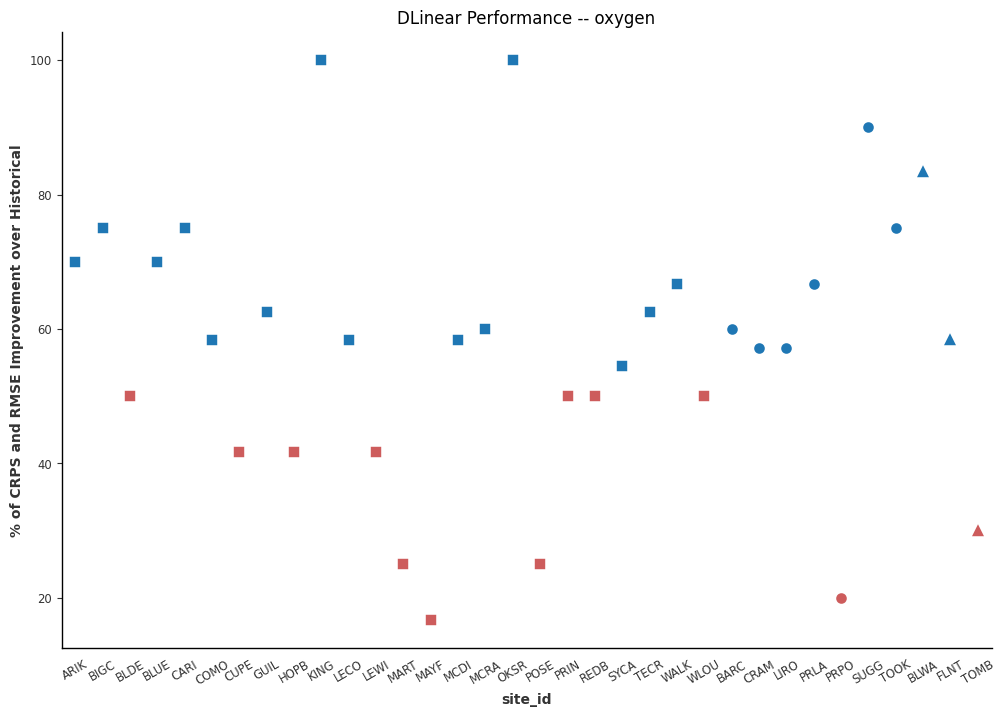

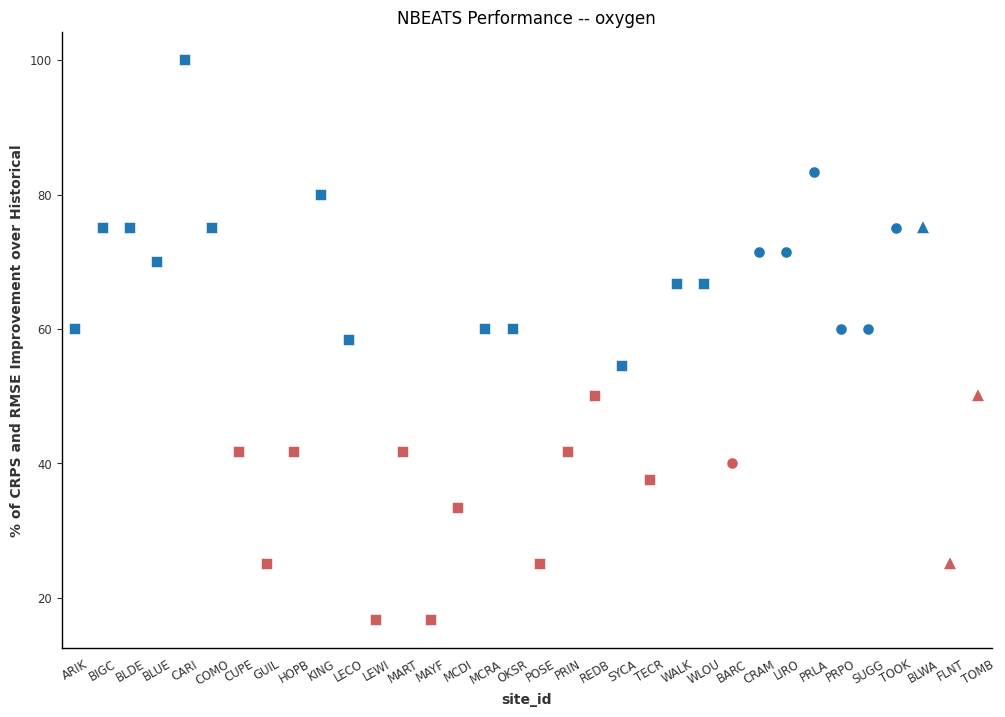

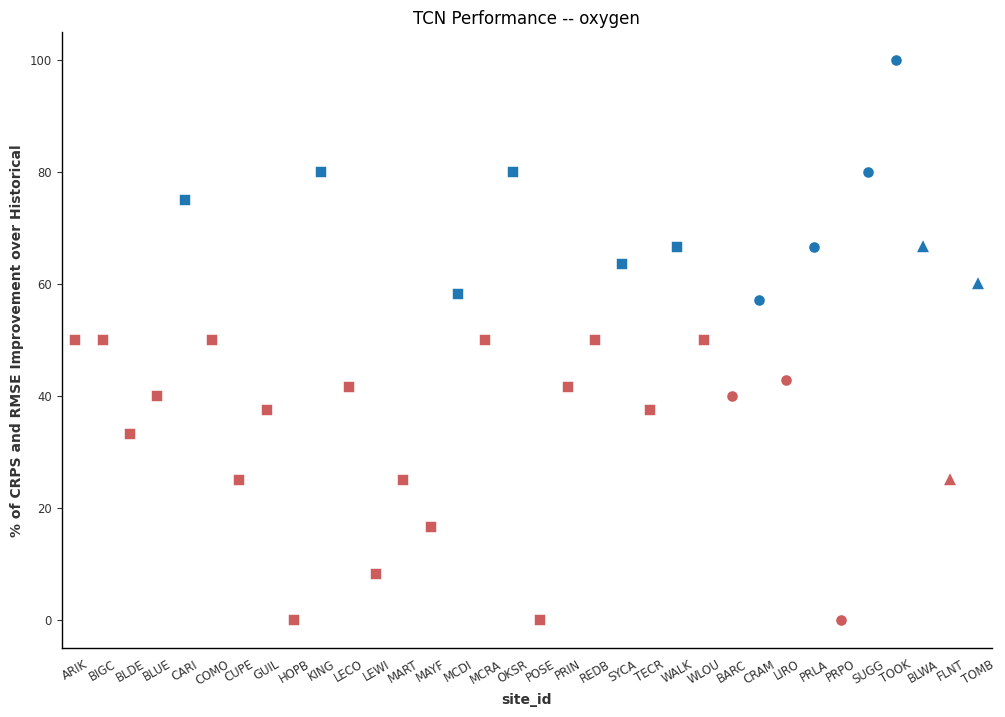

In [9]:
for model in model_names:
    plot_improvement_bysite(scores_dict[model]['oxygen'], metadata, f'{model} Performance -- oxygen')

And, water temperature.

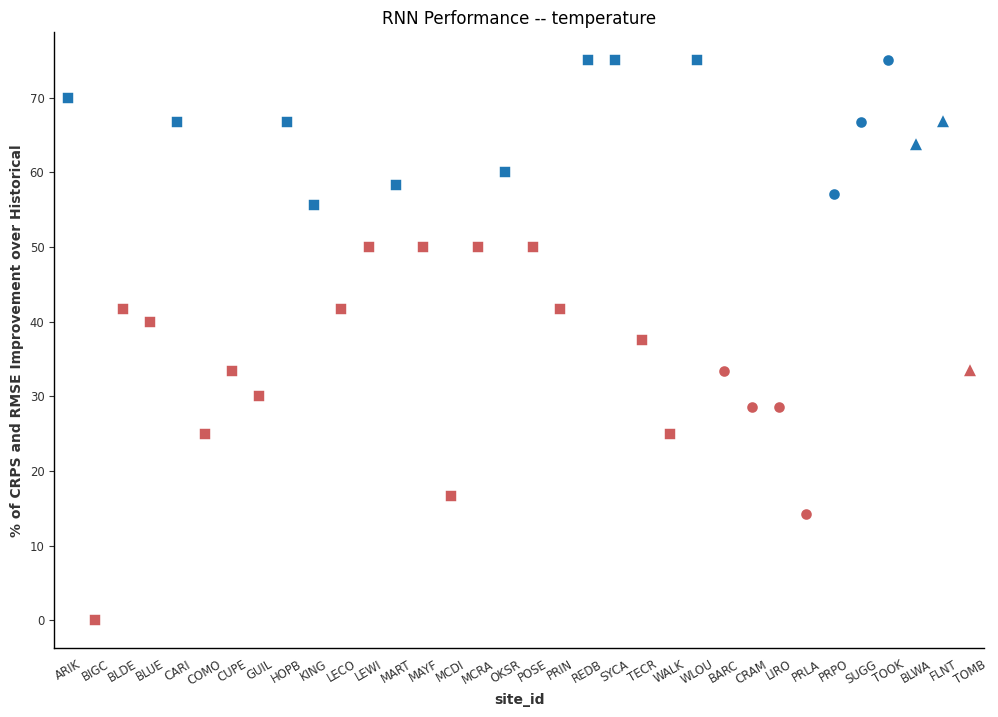

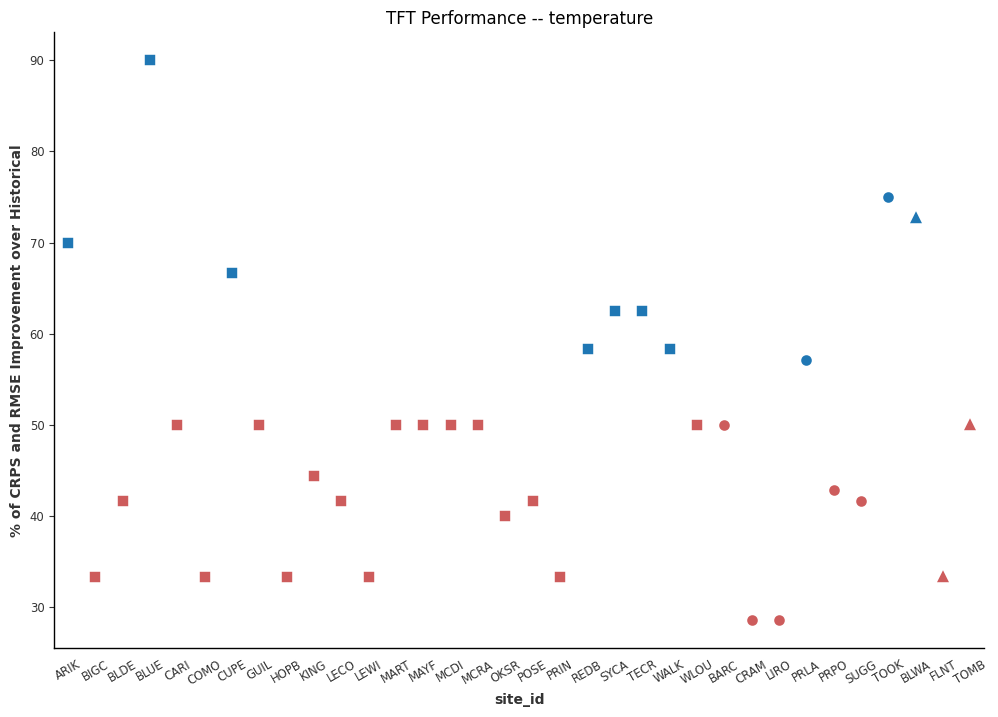

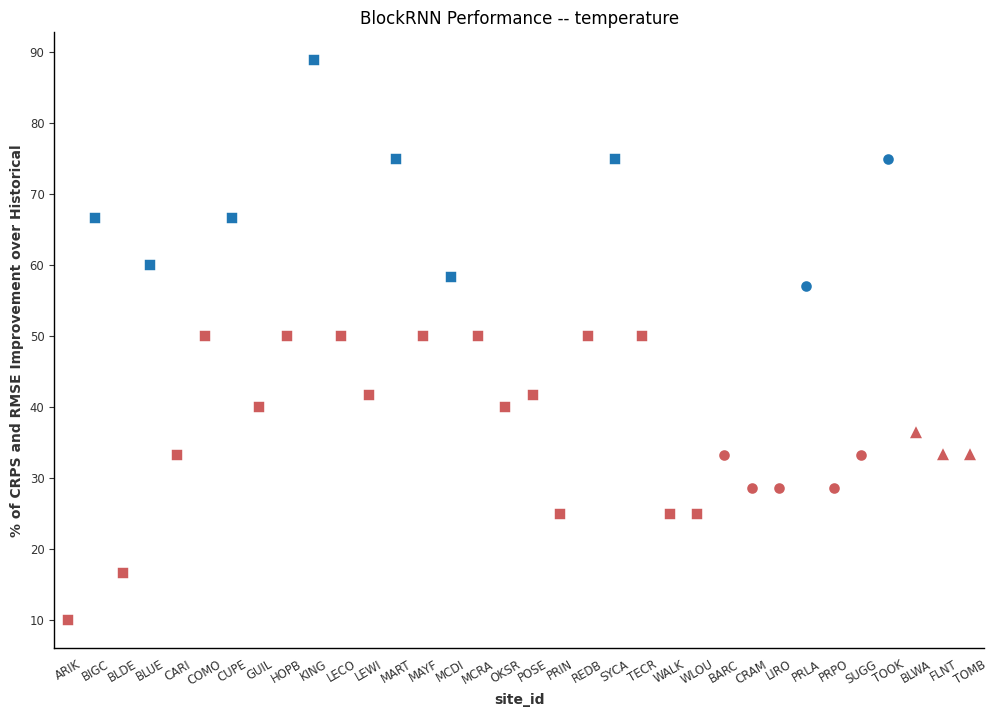

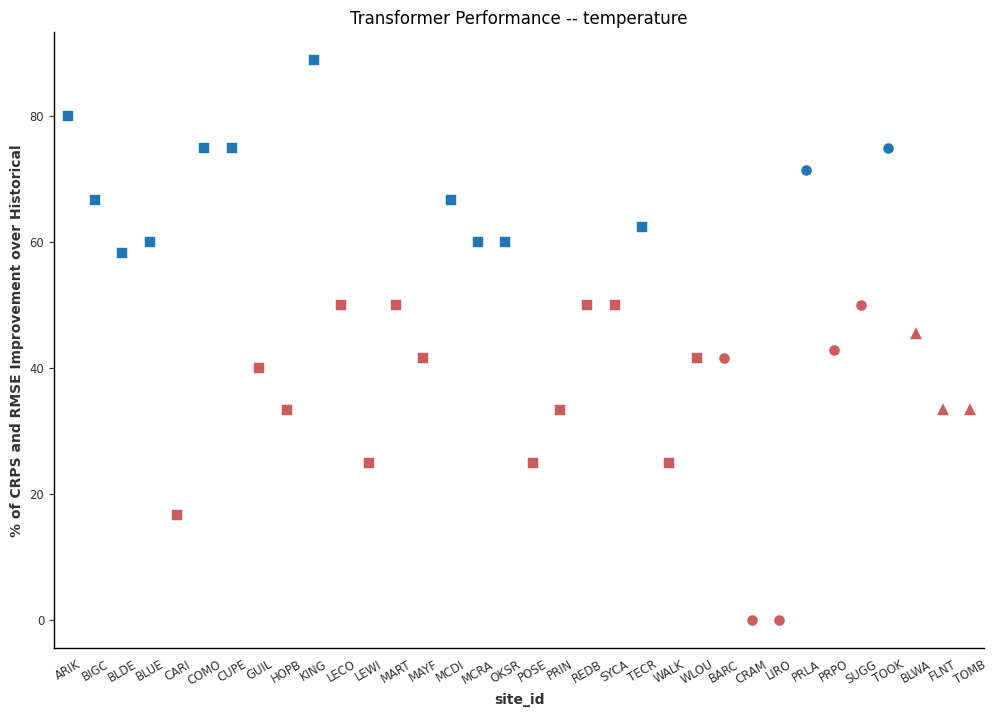

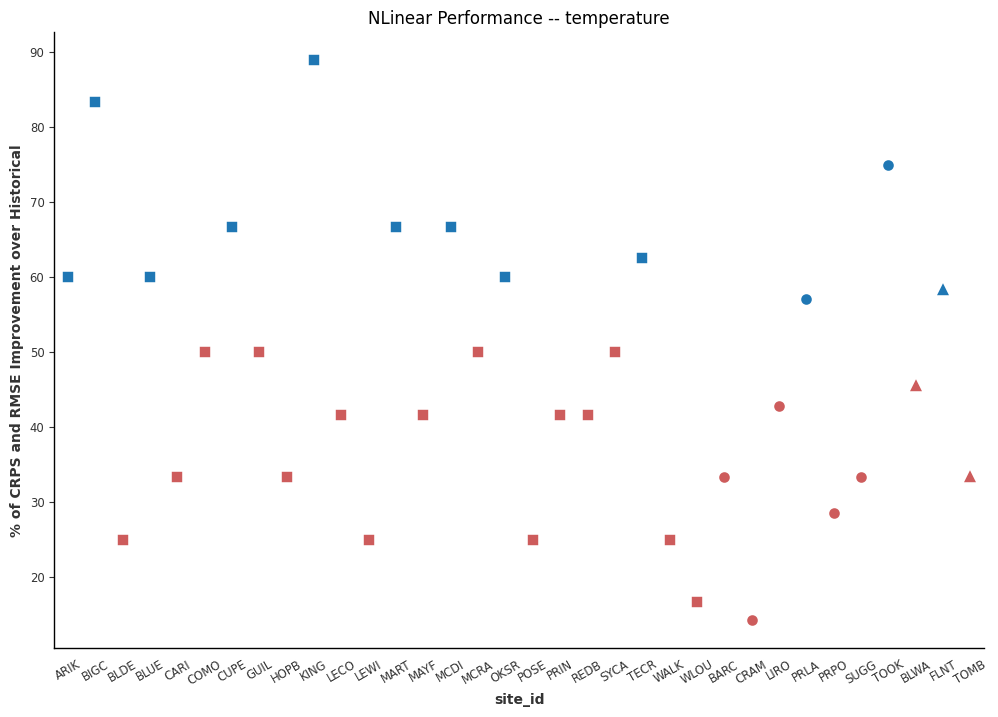

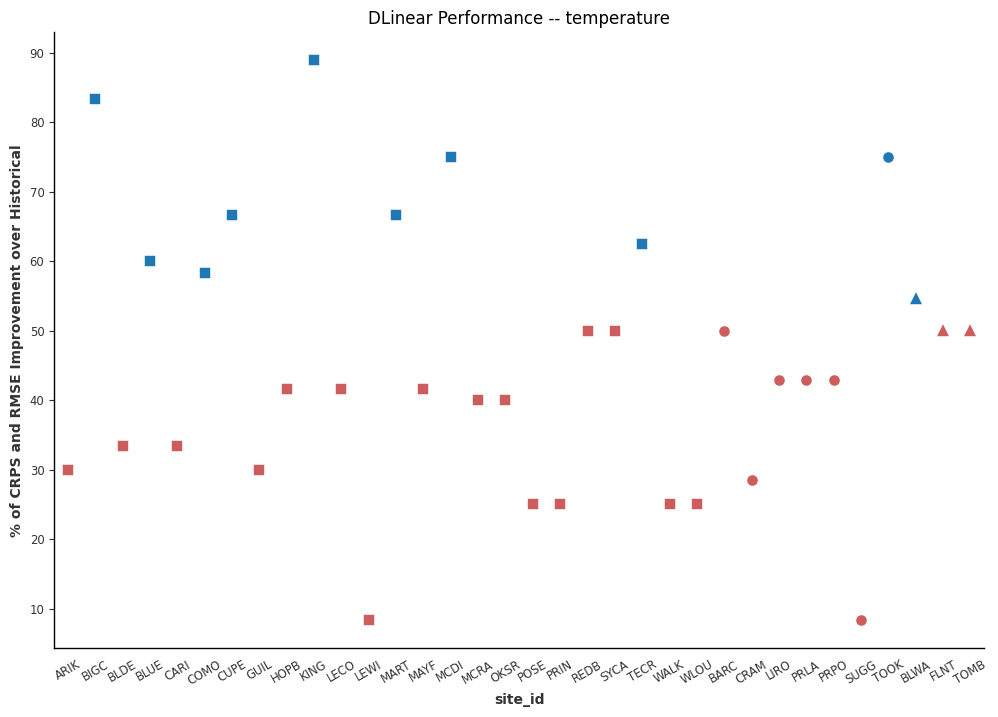

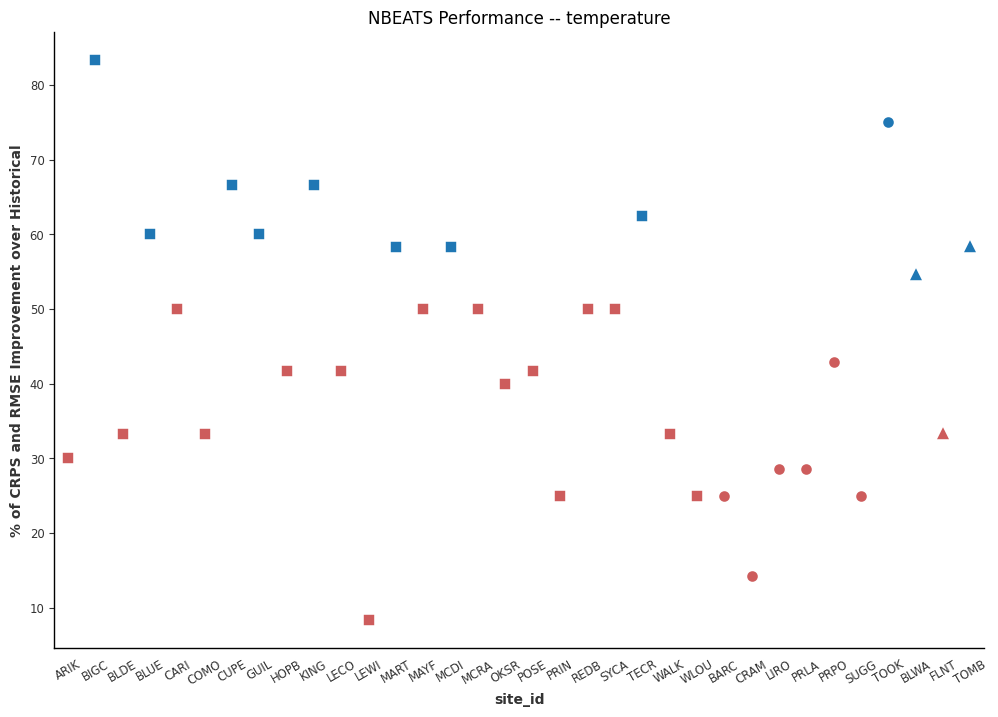

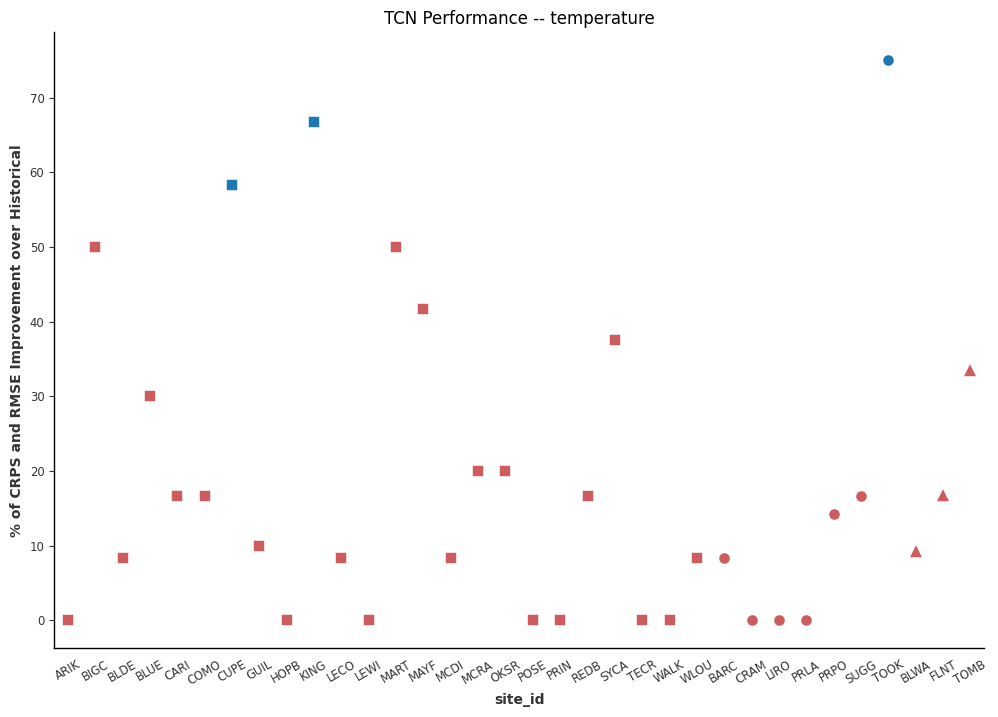

In [10]:
for model in model_names:
    plot_improvement_bysite(scores_dict[model]['temperature'], metadata, f'{model} Performance -- temperature')

And, finally chloryphyll-A

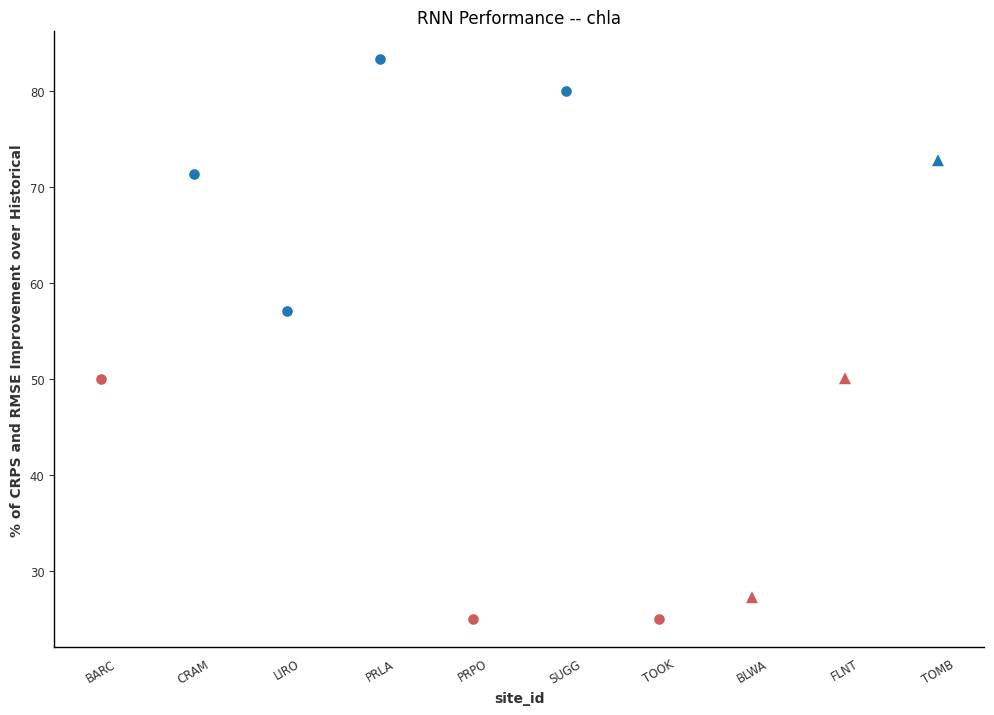

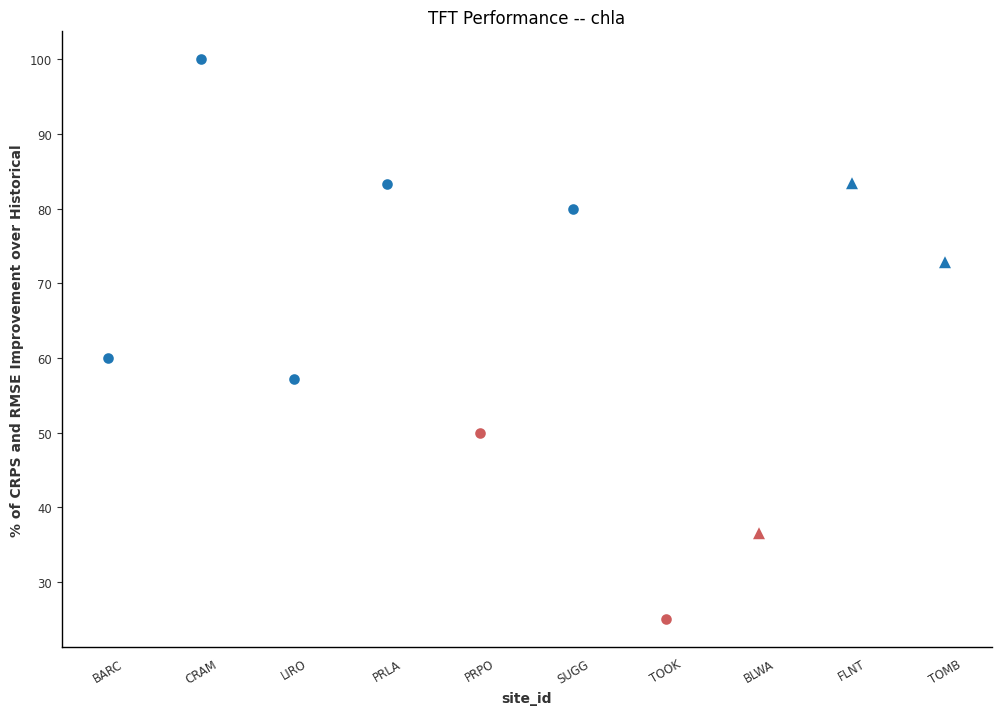

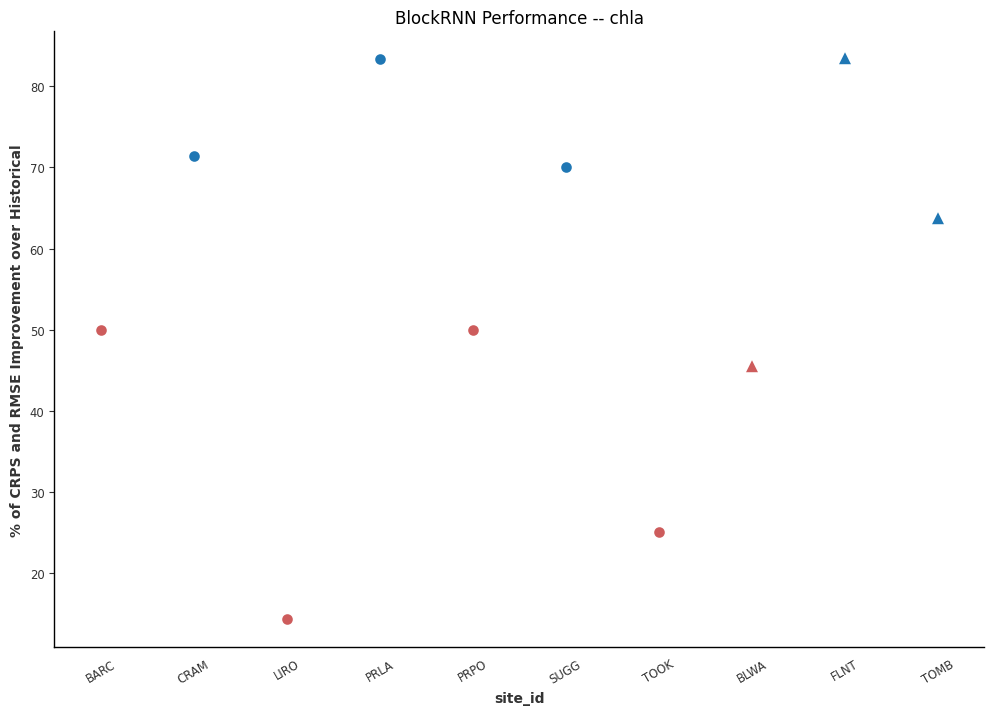

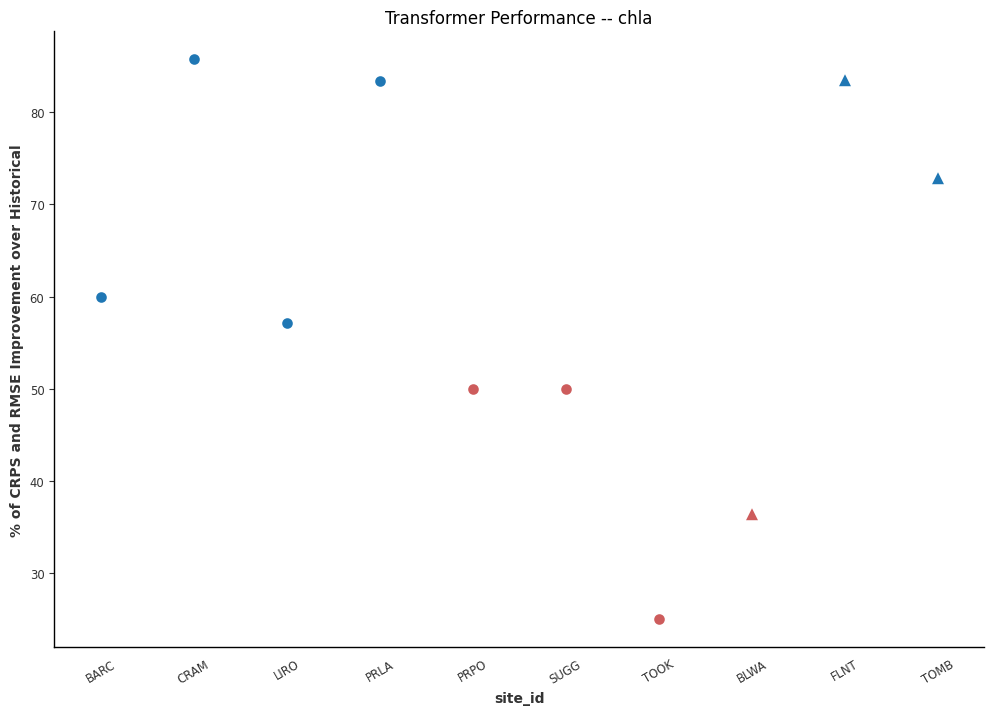

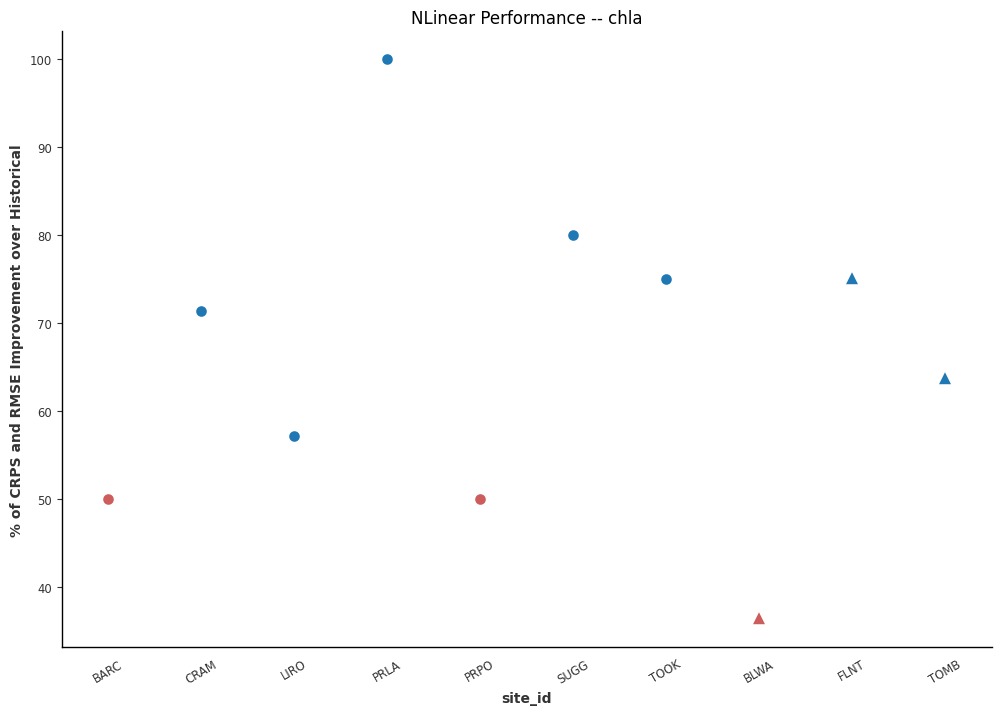

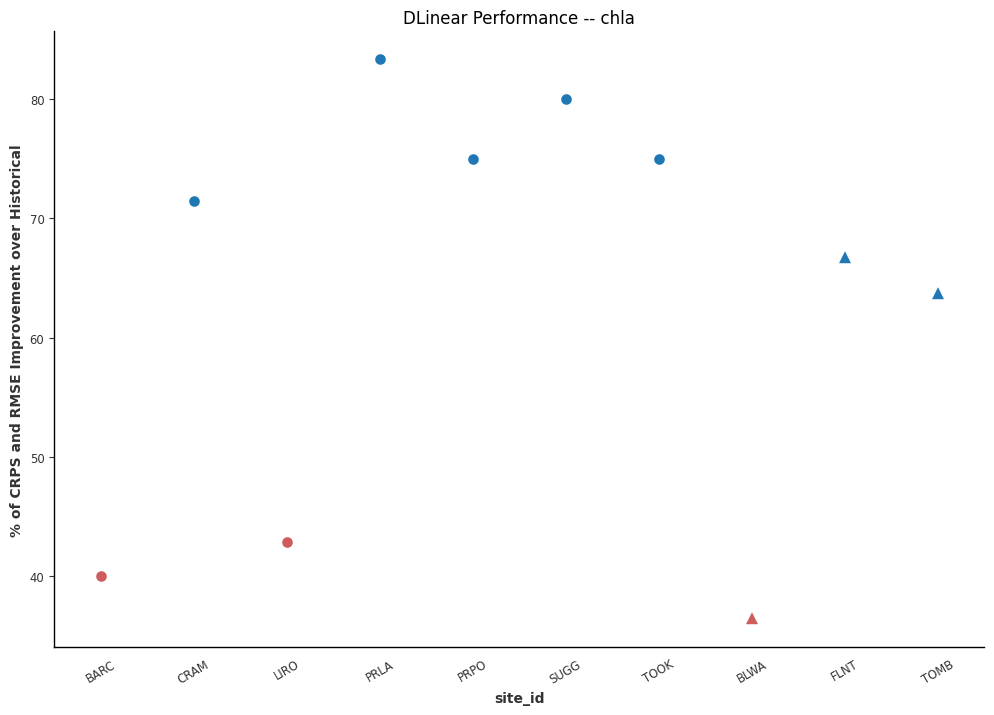

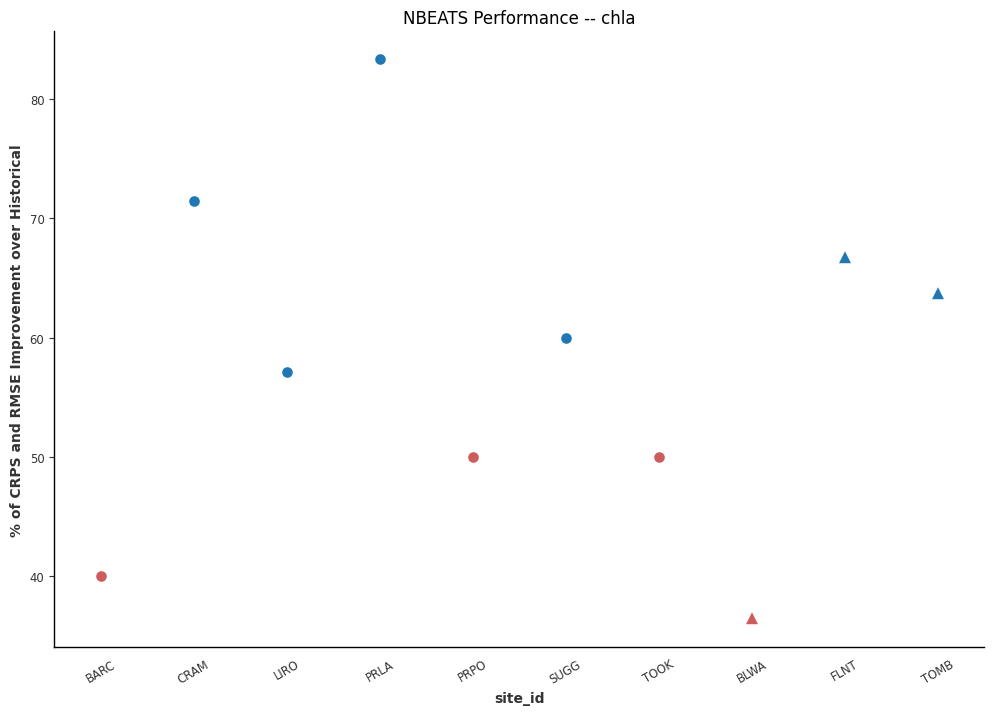

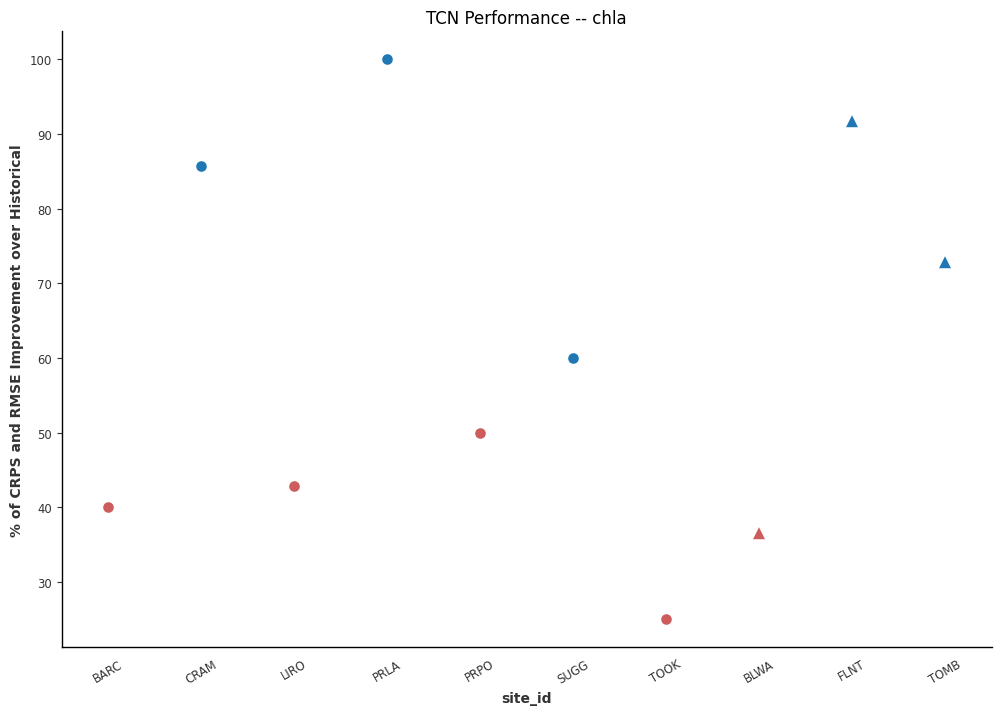

In [11]:
for model in model_names:
    plot_improvement_bysite(scores_dict[model]['chla'], metadata, f'{model} Performance -- chla')

## Scratch work below

Latitude, longitudinal considerations?

In [128]:
from copy import copy
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
x = copy(metadata)

/home/rstudio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


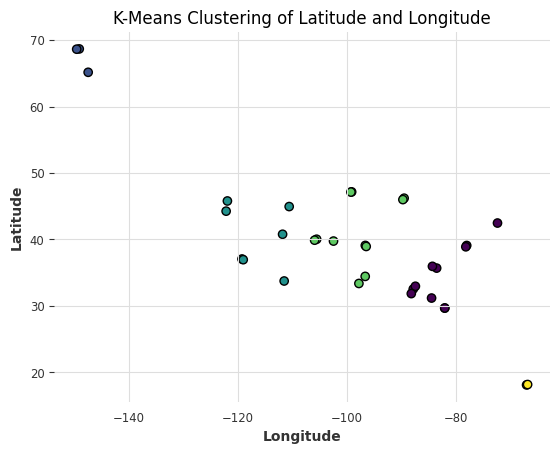

In [142]:
# Define the number of clusters
num_clusters = 5

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
x['cluster'] = kmeans.fit_predict(x[['field_latitude', 'field_longitude']])

# Plot the clusters
plt.scatter(x['field_longitude'], x['field_latitude'], c=x['cluster'], cmap='viridis', edgecolors='k')
plt.title('K-Means Clustering of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/home/rstudio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rstudio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rstudio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rstudio/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/rstudio/.local/lib/pyt

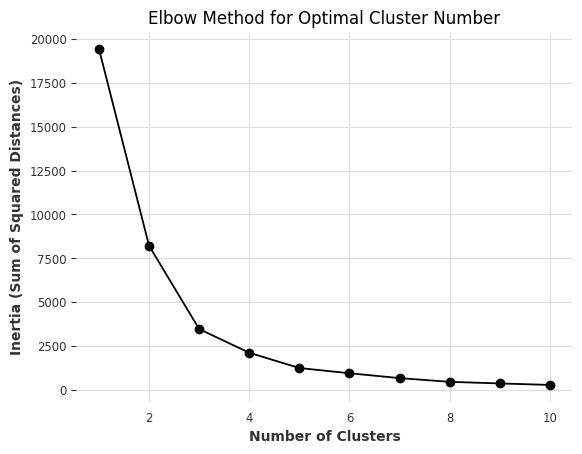

In [131]:

# Evaluate different numbers of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x[['field_latitude', 'field_longitude']])
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()